In [231]:
import pandas as pd

### Load Data

In [232]:
data = pd.read_csv('Data.csv')

In [233]:
df = pd.DataFrame(data)
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [234]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


### Dropping features

In [235]:
df = df.drop(columns = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address',
  'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
  'Votes', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text'], axis = 1)

In [236]:
print(df.columns)
print(df.head())

Index(['City', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating'],
      dtype='object')
               City                          Cuisines  Average Cost for two  \
0       Makati City        French, Japanese, Desserts                  1100   
1       Makati City                          Japanese                  1200   
2  Mandaluyong City  Seafood, Asian, Filipino, Indian                  4000   
3  Mandaluyong City                   Japanese, Sushi                  1500   
4  Mandaluyong City                  Japanese, Korean                  1500   

           Currency Has Table booking Has Online delivery  Price range  \
0  Botswana Pula(P)               Yes                  No            3   
1  Botswana Pula(P)               Yes                  No            3   
2  Botswana Pula(P)               Yes                  No            4   
3  Botswana Pula(P)                No             

In [237]:
feature_cols = ['Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating']

In [238]:
sum = 0
for col in feature_cols:
  print(col, df[col].isnull().sum)
  sum += df[col].isnull().sum()
print(sum)

Cuisines <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Cuisines, Length: 9551, dtype: bool>
Average Cost for two <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Average Cost for two, Length: 9551, dtype: bool>
Currency <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Currency, Length: 9551, dtype: bool>
Has Table booking <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Has Table booking, Length: 9551, dtype: bool>
Has Online delivery <b

### Removing Null values

In [239]:
df = df.dropna(subset=feature_cols)

In [240]:
sum = 0
for col in feature_cols:
  print(col, df[col].isnull().sum)
  sum += df[col].isnull().sum()
print(sum)

Cuisines <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Cuisines, Length: 9542, dtype: bool>
Average Cost for two <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Average Cost for two, Length: 9542, dtype: bool>
Currency <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Currency, Length: 9542, dtype: bool>
Has Table booking <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Has Table booking, Length: 9542, dtype: bool>
Has Online delivery <b

### Encoding City Feature

In [241]:
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts < 20].index
df['City_grouped'] = df['City'].apply(lambda x: x if x not in rare_cities else 'Other')

In [242]:
city_dummies = pd.get_dummies(df['City_grouped'], prefix='City')

df = pd.concat([df, city_dummies], axis=1)

df.drop(columns=['City', 'City_grouped'], axis=1, inplace=True)

In [243]:
print(df.head())

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery  Price range  Aggregate rating  \
0               Yes                  No            3               4.8   
1               Yes                  No            3               4.5   
2               Yes                  No            4               4.4   
3                No                  No            4               4.9   
4               Yes                  No            4               4.8   

   City_Abu Dhabi  City_Agra  City_Ahmedabad  ...  City_Sioux City  \
0         

### Encoding Categorical Features

In [244]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [245]:
print(df['Currency'].unique().sum())

Botswana Pula(P)Brazilian Real(R$)Dollar($)Emirati Diram(AED)Indian Rupees(Rs.)Indonesian Rupiah(IDR)NewZealand($)Pounds(��)Qatari Rial(QR)Rand(R)Sri Lankan Rupee(LKR)Turkish Lira(TL)


In [246]:
currency_dummies = pd.get_dummies(df['Currency'], drop_first=True)
df = pd.concat([df, currency_dummies], axis=1)
df.drop(columns=['Currency'], inplace=True)

In [247]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', '))

In [248]:
print(df.head())

                             Cuisines  Average Cost for two  \
0        [French, Japanese, Desserts]                  1100   
1                          [Japanese]                  1200   
2  [Seafood, Asian, Filipino, Indian]                  4000   
3                   [Japanese, Sushi]                  1500   
4                  [Japanese, Korean]                  1500   

   Has Table booking  Has Online delivery  Price range  Aggregate rating  \
0                  1                    0            3               4.8   
1                  1                    0            3               4.5   
2                  1                    0            4               4.4   
3                  0                    0            4               4.9   
4                  1                    0            4               4.8   

   City_Abu Dhabi  City_Agra  City_Ahmedabad  City_Allahabad  ...  Dollar($)  \
0           False      False           False           False  ...      False   
1   

In [249]:
from sklearn.preprocessing import MultiLabelBinarizer

In [250]:
mlb = MultiLabelBinarizer()

cuisine_dummies = pd.DataFrame(mlb.fit_transform(df['Cuisines']),
                               columns=mlb.classes_,
                               index=df.index
                               )

df = pd.concat([df, cuisine_dummies], axis=1)
df.drop(columns=['Cuisines'], inplace=True)

In [251]:
print(df.head())

   Average Cost for two  Has Table booking  Has Online delivery  Price range  \
0                  1100                  1                    0            3   
1                  1200                  1                    0            3   
2                  4000                  1                    0            4   
3                  1500                  0                    0            4   
4                  1500                  1                    0            4   

   Aggregate rating  City_Abu Dhabi  City_Agra  City_Ahmedabad  \
0               4.8           False      False           False   
1               4.5           False      False           False   
2               4.4           False      False           False   
3               4.9           False      False           False   
4               4.8           False      False           False   

   City_Allahabad  City_Amritsar  ...  Teriyaki  Tex-Mex  Thai  Tibetan  \
0           False          False  ...         0

### Splitting Dataset

In [252]:
X = df.drop(columns=['Aggregate rating'], axis=1)
y = df['Aggregate rating']


In [253]:
print(X.head())
print(y.head())

   Average Cost for two  Has Table booking  Has Online delivery  Price range  \
0                  1100                  1                    0            3   
1                  1200                  1                    0            3   
2                  4000                  1                    0            4   
3                  1500                  0                    0            4   
4                  1500                  1                    0            4   

   City_Abu Dhabi  City_Agra  City_Ahmedabad  City_Allahabad  City_Amritsar  \
0           False      False           False           False          False   
1           False      False           False           False          False   
2           False      False           False           False          False   
3           False      False           False           False          False   
4           False      False           False           False          False   

   City_Ankara  ...  Teriyaki  Tex-Mex  Thai

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Decision Tree

In [256]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [257]:
from sklearn.metrics import mean_squared_error, r2_score

In [258]:
dt_pred = model.predict(X_test)
mse = mean_squared_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1.6664484796226133
R-Squared: 0.272303472940872


### Random Forest


In [259]:
df = df.drop([col for col in df.columns if 'City_' in col], axis=1)
X_train = X_train.drop([col for col in X_train.columns if 'City_' in col], axis=1)
X_test = X_test.drop([col for col in X_test.columns if 'City_' in col], axis=1)
X = X.drop([col for col in X.columns if 'City_' in col], axis=1)

In [260]:
print(X_train.head())
print(X_test.head())

      Average Cost for two  Has Table booking  Has Online delivery  \
8177                   450                  0                    0   
6401                   700                  0                    0   
81                     120                  0                    0   
1332                   300                  0                    0   
9041                   500                  0                    1   

      Price range  Brazilian Real(R$)  Dollar($)  Emirati Diram(AED)  \
8177            1               False      False               False   
6401            2               False      False               False   
81              4                True      False               False   
1332            1               False      False               False   
9041            2               False      False               False   

      Indian Rupees(Rs.)  Indonesian Rupiah(IDR)  NewZealand($)  ...  \
8177                True                   False          False  ...   
64

In [261]:
from sklearn.ensemble import RandomForestRegressor

In [262]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [263]:
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
rf_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, rf_pred))
print("R-Squared:", r2_score(y_test, rf_pred))


MSE: 1.5122560548637125
R-Squared: 0.33963546271909084


### Test on Sample data

In [265]:
print(df.loc[123, 'Aggregate rating'])

4.6


In [266]:
prediction = rf.predict(X.iloc[[123]])

print(prediction)

[4.00625]


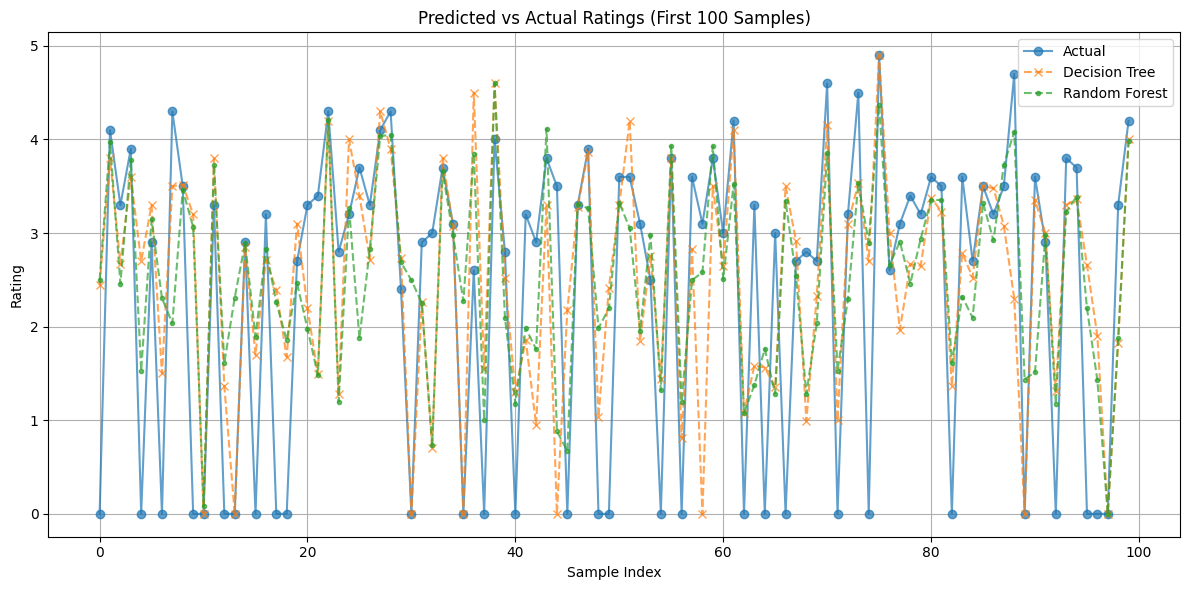

In [271]:
import matplotlib.pyplot as plt

sample_size = 100
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:sample_size], label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(dt_pred[:sample_size], label='Decision Tree', marker='x', linestyle='--', alpha=0.7)
plt.plot(rf_pred[:sample_size], label='Random Forest', marker='.', linestyle='--', alpha=0.7)
plt.title('Predicted vs Actual Ratings (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
